In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  # data visulaisation libaries
import seaborn as sns  # data visulaisation libaries
import scipy.stats as stats # Statistical Library
import matplotlib.image as mpimg # for images

img = mpimg.imread('image_1.png') 
plt.figure(figsize=(20,30))
plt.imshow(img)

# Reading train data set

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
train['data'] = 'train'
test['data'] = 'test'

In [13]:
df.isnull().sum()[df.isnull().sum()!=0]  # null values are present in these columns

Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Months_Since_Deliquency    147238
Interest_Rate              109541
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  273850 non-null  int64  
 1   Loan_Amount_Requested    273850 non-null  object 
 2   Length_Employed          261543 non-null  object 
 3   Home_Owner               231790 non-null  object 
 4   Annual_Income            231850 non-null  float64
 5   Income_Verified          273850 non-null  object 
 6   Purpose_Of_Loan          273850 non-null  object 
 7   Debt_To_Income           273850 non-null  float64
 8   Inquiries_Last_6Mo       273850 non-null  int64  
 9   Months_Since_Deliquency  126612 non-null  float64
 10  Number_Open_Accounts     273850 non-null  int64  
 11  Total_Accounts           273850 non-null  int64  
 12  Gender                   273850 non-null  object 
 13  Interest_Rate            164309 non-null  float64
 14  data

# Data Cleaning 

In [15]:
df.drop('Loan_ID',axis=1,inplace = True)

In [16]:
df["Loan_Amount_Requested"] = df["Loan_Amount_Requested"].str.replace(",","").astype(float)

# missing values

In [17]:
df.Annual_Income.fillna(df.Annual_Income.median(),inplace=True) 

In [18]:
df.Home_Owner.fillna('None',inplace =True)

In [19]:
df.Months_Since_Deliquency.fillna(360,inplace =True)

In [20]:
df.Length_Employed.fillna("< 1 year",inplace=True)

In [21]:
df.isnull().sum()[df.isnull().sum()!=0]

Interest_Rate    109541
dtype: int64

## outliers

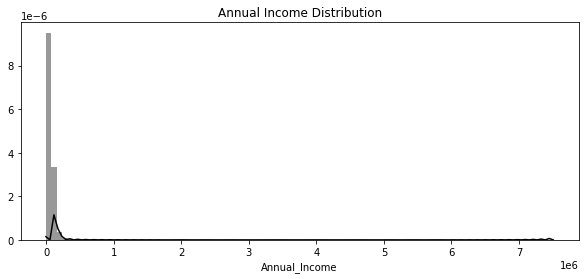

In [22]:
plt.figure(figsize =(10,4))
plt.title('Annual Income Distribution')
#plt.savefig('income_dist_outlier', dpi=300, bbox_inches='tight')
sns.distplot(df.Annual_Income,bins=100,color='black')
plt.show()

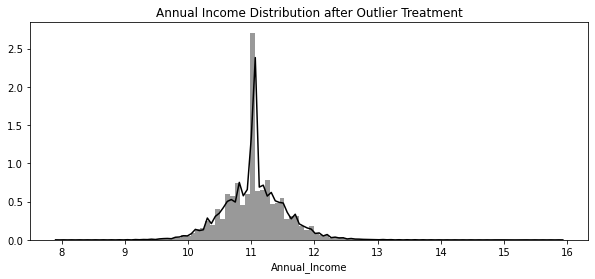

In [23]:
df.Annual_Income=np.log(df.Annual_Income)
plt.figure(figsize =(10,4))
plt.title('Annual Income Distribution after Outlier Treatment')
# plt.savefig('income_dist_outlier_after', dpi=300, bbox_inches='tight')
sns.distplot(df.Annual_Income,bins=100,color='black')
plt.show()

## Encoding

In [24]:
def ln_emp(x):
    if x == '1 year':
        x =1
    elif x == '10+ years':
        x = 11
    elif x =='2 years':
        x=2
    elif x == '3 years':
        x =3
    elif x == '4 years':
        x =4
    elif x == '5 years':
        x =5
    elif x == '6 years':
        x =6
    elif x == '7 years':
        x =7
    elif x == '8 years':
        x =8
    elif x == '9 years':
        x =9
    elif x == '< 1 year':
        x =0
    return(x)
df.Length_Employed = df.Length_Employed.apply(ln_emp)

In [25]:
def gndr(x):
    if x == 'Male':
        x = 1
    elif x == 'Female':
        x = 0
    return(x)
df.Gender = df.Gender.apply(gndr)

In [26]:
def incm_ver(x):
    if x == 'VERIFIED - income':
        x = 10
    elif x == 'VERIFIED - income source':
        x = 5
    elif x == 'not verified':
        x = 0
    return(x)
df.Income_Verified = df.Income_Verified.apply(incm_ver)
    

In [27]:
def ln_pur(x):
    if x == 'debt_consolidation':
        x ="Liability"
    elif x == 'house':
        x ="Asset"
    elif x =='small_business':
        x="Asset"
    elif x == 'credit_card':
        x ="Liability"
    elif x == 'home_improvement':
        x ="Asset"
    elif x == 'wedding':
        x ="Liability"
    elif x == 'major_purchase':
        x ="Others"
    elif x == 'other':
        x ="Others"
    elif x == 'renewable_energy':
        x ="Asset"
    elif x == 'medical':
        x ="Liability"
    elif x == 'car':
        x = "Liability"
    elif x == 'moving':
        x ="Liability"
    elif x == 'educational':
        x ="Others"
    elif x == 'vacation':
        x ="Liability"

    return(x)
df['Purpose_Of_Loan'] = df['Purpose_Of_Loan'].apply(ln_pur)

In [31]:
df = pd.get_dummies(df,drop_first=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan_Amount_Requested      273850 non-null  float64
 1   Length_Employed            273850 non-null  int64  
 2   Annual_Income              273850 non-null  float64
 3   Income_Verified            273850 non-null  int64  
 4   Debt_To_Income             273850 non-null  float64
 5   Inquiries_Last_6Mo         273850 non-null  int64  
 6   Months_Since_Deliquency    273850 non-null  float64
 7   Number_Open_Accounts       273850 non-null  int64  
 8   Total_Accounts             273850 non-null  int64  
 9   Gender                     273850 non-null  int64  
 10  Interest_Rate              164309 non-null  float64
 11  Home_Owner_None            273850 non-null  uint8  
 12  Home_Owner_Other           273850 non-null  uint8  
 13  Home_Owner_Own             27

## Feature Engineering

### 1) Closed to total ratio
It will depict that out of total accounts(loan) how many percentage of accounts(loans) has been closed by the customer
Higher the percentage better the customer.

In [34]:
df["Number_Closed_Acc"]=df["Total_Accounts"]-df["Number_Open_Accounts"]

In [35]:
df["close_to_total_ratio"]=round(((df["Number_Closed_Acc"]/df["Total_Accounts"])*100),2)

#### Dropping redundant columns

In [36]:
df.drop(["Number_Closed_Acc","Total_Accounts"],axis=1,inplace=True)

In [37]:
df.head(2)

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Gender,Interest_Rate,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_Liability,Purpose_Of_Loan_Others,data_train,close_to_total_ratio
0,7000.0,0,11.127263,0,18.37,0,360.0,9,0,1.0,0,0,0,1,1,0,1,35.71
1,30000.0,4,11.050890,10,14.93,0,17.0,12,0,3.0,0,0,0,0,1,0,1,50.00


# 5 point summary

In [38]:
df.describe().T[['mean','std','min','25%','50%','75%','max']]

,mean,std,min,25%,50%,75%,max
Loan_Amount_Requested,14352.992240,8289.036702,500.000000,8000.000000,12000.00000,20000.000000,35000.000000
Length_Employed,6.053171,4.131643,0.000000,2.000000,6.00000,11.000000,11.000000
Annual_Income,11.057100,0.479286,8.006368,10.791379,11.05089,11.314475,15.830414
Income_Verified,5.229231,4.109845,0.000000,0.000000,5.00000,10.000000,10.000000
Debt_To_Income,17.215901,7.845967,0.000000,11.360000,16.85000,22.780000,39.990000
Inquiries_Last_6Mo,0.784543,1.036816,0.000000,0.000000,0.00000,1.000000,8.000000
Months_Since_Deliquency,209.324736,163.157407,0.000000,34.000000,360.00000,360.000000,360.000000
Number_Open_Accounts,11.186025,4.973663,0.000000,8.000000,10.00000,14.000000,84.000000
Gender,0.712043,0.452812,0.000000,0.000000,1.00000,1.000000,1.000000
Interest_Rate,2.158951,0.738364,1.000000,2.000000,2.00000,3.000000,3.000000


# Statistics

Since logit only gives output from 0 - 1  hence we classify 

In [40]:
def cte(x):
    if x == 1:
        x = 0
    elif x == 2:
        x = 0.5
    elif x == 3:
        x = 1

    return(x)
y_new = df['Interest_Rate'].apply(cte)

In [41]:
y_new.value_counts()

0.5    70580
1.0    59923
0.0    33806
Name: Interest_Rate, dtype: int64

In [45]:
X.shape

(273850, 17)

In [46]:
y.shape

(273850,)

## Feature selection
1. using sklearn selectKbest
2. using machine learning algorithm feature importance
## dropping home_own_other

In [55]:
df.drop('Home_Owner_Other',axis=1,inplace =True)

In [56]:
df.sample(5)

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Gender,Interest_Rate,Home_Owner_None,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_Liability,Purpose_Of_Loan_Others,data_train,close_to_total_ratio
40378,1200.0,11,10.839581,5,27.34,1,16.0,15,0,2.0,0,0,0,0,0,1,58.33
95818,10075.0,1,11.088278,10,19.62,0,70.0,13,0,2.0,0,0,1,1,0,1,62.86
5703,5000.0,8,11.050890,0,27.68,2,360.0,11,1,3.0,0,0,1,0,1,1,54.17
151984,5000.0,4,10.404263,10,18.62,1,43.0,5,1,2.0,0,1,0,1,0,1,44.44
218889,20125.0,7,11.156251,10,12.65,0,360.0,7,1,NaN,1,0,0,0,1,0,58.82


test set = data_train==0

# splitting back to Train_set, testset

In [57]:
train_set = df[df.data_train==1]
test_set = df[df.data_train==0]

In [58]:
train_set.sample(5)

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Gender,Interest_Rate,Home_Owner_None,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_Liability,Purpose_Of_Loan_Others,data_train,close_to_total_ratio
102296,13000.0,11,10.126631,0,5.89,0,360.0,19,0,3.0,0,0,0,0,0,1,44.12
48180,24800.0,11,12.196022,5,26.12,3,360.0,16,1,2.0,1,0,0,1,0,1,44.83
94754,18000.0,7,11.225243,5,27.68,1,360.0,14,0,2.0,0,0,0,1,0,1,53.33
98786,12800.0,11,11.002100,0,13.80,0,360.0,9,1,2.0,1,0,0,1,0,1,30.77
147267,13000.0,11,10.668955,0,18.73,0,360.0,10,1,1.0,0,0,0,1,0,1,28.57


# X y split on train_set

In [67]:
y=train_set["Interest_Rate"]
X=train_set.drop(["Interest_Rate",'data_train'],axis=1)

# balancing

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('auto')

Using TensorFlow backend.


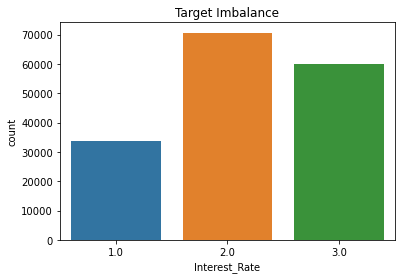

In [66]:
sns.countplot(y)
plt.title('Target Imbalance')
#plt.savefig('target_imbalnce.png', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
X_sm, y_sm = smote.fit_sample(X,y)
print(X_sm.shape, y_sm.shape)

(211740, 15) (211740,)


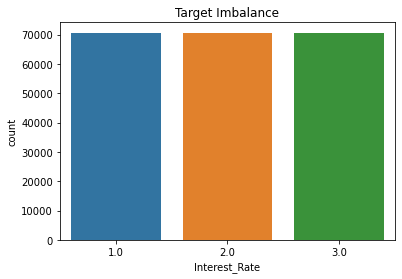

In [69]:
sns.countplot(y_sm)
plt.title('Target Imbalance')
#plt.savefig('target_imbalnce.png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
X_sm.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Gender',
       'Home_Owner_None', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Purpose_Of_Loan_Liability', 'Purpose_Of_Loan_Others',
       'close_to_total_ratio'],
      dtype='object')

# CATBoost

In [72]:
cate_features_index = np.where(X.dtypes != float)[0]
cate_features_index

array([ 1,  3,  5,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [74]:

from catboost import Pool, CatBoostClassifier


The best parameters across ALL searched params:
 {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

In [75]:
# Now on balanced dataset

modelCat = CatBoostClassifier(depth=8,learning_rate=0.1)
modelCat.fit(X_sm,y_sm,cat_features=cate_features_index,)


0:	learn: 1.0740722	total: 875ms	remaining: 14m 33s
1:	learn: 1.0539980	total: 1.68s	remaining: 14m
2:	learn: 1.0384021	total: 2.69s	remaining: 14m 55s
3:	learn: 1.0243055	total: 3.74s	remaining: 15m 30s
4:	learn: 1.0126094	total: 4.59s	remaining: 15m 14s
5:	learn: 1.0023728	total: 5.45s	remaining: 15m 2s
6:	learn: 0.9944698	total: 6.23s	remaining: 14m 43s
7:	learn: 0.9865333	total: 7.1s	remaining: 14m 40s
8:	learn: 0.9801604	total: 7.84s	remaining: 14m 23s
9:	learn: 0.9742305	total: 8.71s	remaining: 14m 22s
10:	learn: 0.9688364	total: 9.72s	remaining: 14m 33s
11:	learn: 0.9639686	total: 10.8s	remaining: 14m 51s
12:	learn: 0.9594498	total: 11.7s	remaining: 14m 51s
13:	learn: 0.9555550	total: 12.5s	remaining: 14m 41s
14:	learn: 0.9514667	total: 13.3s	remaining: 14m 34s
15:	learn: 0.9483650	total: 14.1s	remaining: 14m 28s
16:	learn: 0.9452076	total: 15s	remaining: 14m 26s
17:	learn: 0.9421428	total: 15.9s	remaining: 14m 28s
18:	learn: 0.9393910	total: 17s	remaining: 14m 38s
19:	learn: 0.

154:	learn: 0.8708287	total: 2m 13s	remaining: 12m 6s
155:	learn: 0.8706275	total: 2m 14s	remaining: 12m 5s
156:	learn: 0.8704745	total: 2m 14s	remaining: 12m 4s
157:	learn: 0.8703214	total: 2m 15s	remaining: 12m 3s
158:	learn: 0.8700996	total: 2m 16s	remaining: 12m 2s
159:	learn: 0.8699236	total: 2m 17s	remaining: 12m
160:	learn: 0.8697372	total: 2m 18s	remaining: 11m 59s
161:	learn: 0.8695560	total: 2m 18s	remaining: 11m 58s
162:	learn: 0.8692982	total: 2m 19s	remaining: 11m 58s
163:	learn: 0.8691113	total: 2m 20s	remaining: 11m 57s
164:	learn: 0.8687930	total: 2m 21s	remaining: 11m 56s
165:	learn: 0.8686463	total: 2m 22s	remaining: 11m 55s
166:	learn: 0.8684710	total: 2m 23s	remaining: 11m 54s
167:	learn: 0.8682735	total: 2m 23s	remaining: 11m 53s
168:	learn: 0.8680608	total: 2m 24s	remaining: 11m 51s
169:	learn: 0.8678151	total: 2m 25s	remaining: 11m 50s
170:	learn: 0.8675595	total: 2m 26s	remaining: 11m 49s
171:	learn: 0.8673840	total: 2m 27s	remaining: 11m 48s
172:	learn: 0.86718

305:	learn: 0.8487798	total: 3m 56s	remaining: 8m 55s
306:	learn: 0.8486724	total: 3m 56s	remaining: 8m 53s
307:	learn: 0.8485243	total: 3m 57s	remaining: 8m 52s
308:	learn: 0.8484210	total: 3m 57s	remaining: 8m 51s
309:	learn: 0.8483416	total: 3m 58s	remaining: 8m 50s
310:	learn: 0.8482840	total: 3m 58s	remaining: 8m 49s
311:	learn: 0.8482030	total: 3m 59s	remaining: 8m 47s
312:	learn: 0.8481527	total: 3m 59s	remaining: 8m 46s
313:	learn: 0.8480406	total: 4m	remaining: 8m 45s
314:	learn: 0.8479456	total: 4m	remaining: 8m 43s
315:	learn: 0.8477824	total: 4m 1s	remaining: 8m 42s
316:	learn: 0.8477090	total: 4m 2s	remaining: 8m 41s
317:	learn: 0.8476420	total: 4m 2s	remaining: 8m 40s
318:	learn: 0.8474955	total: 4m 3s	remaining: 8m 38s
319:	learn: 0.8473291	total: 4m 3s	remaining: 8m 37s
320:	learn: 0.8472236	total: 4m 4s	remaining: 8m 36s
321:	learn: 0.8471153	total: 4m 4s	remaining: 8m 35s
322:	learn: 0.8470290	total: 4m 5s	remaining: 8m 34s
323:	learn: 0.8469155	total: 4m 5s	remaining

459:	learn: 0.8328457	total: 5m 19s	remaining: 6m 14s
460:	learn: 0.8327337	total: 5m 19s	remaining: 6m 13s
461:	learn: 0.8325955	total: 5m 20s	remaining: 6m 12s
462:	learn: 0.8324583	total: 5m 20s	remaining: 6m 11s
463:	learn: 0.8323684	total: 5m 21s	remaining: 6m 11s
464:	learn: 0.8322579	total: 5m 21s	remaining: 6m 10s
465:	learn: 0.8321513	total: 5m 22s	remaining: 6m 9s
466:	learn: 0.8320273	total: 5m 22s	remaining: 6m 8s
467:	learn: 0.8319702	total: 5m 23s	remaining: 6m 7s
468:	learn: 0.8318427	total: 5m 23s	remaining: 6m 6s
469:	learn: 0.8317202	total: 5m 24s	remaining: 6m 5s
470:	learn: 0.8316720	total: 5m 24s	remaining: 6m 4s
471:	learn: 0.8315927	total: 5m 25s	remaining: 6m 4s
472:	learn: 0.8315703	total: 5m 25s	remaining: 6m 3s
473:	learn: 0.8314902	total: 5m 26s	remaining: 6m 2s
474:	learn: 0.8313873	total: 5m 27s	remaining: 6m 1s
475:	learn: 0.8313188	total: 5m 27s	remaining: 6m
476:	learn: 0.8312169	total: 5m 28s	remaining: 5m 59s
477:	learn: 0.8311430	total: 5m 28s	remain

612:	learn: 0.8184606	total: 6m 41s	remaining: 4m 13s
613:	learn: 0.8184317	total: 6m 42s	remaining: 4m 12s
614:	learn: 0.8183355	total: 6m 42s	remaining: 4m 12s
615:	learn: 0.8182776	total: 6m 43s	remaining: 4m 11s
616:	learn: 0.8181936	total: 6m 43s	remaining: 4m 10s
617:	learn: 0.8180236	total: 6m 44s	remaining: 4m 9s
618:	learn: 0.8179300	total: 6m 44s	remaining: 4m 9s
619:	learn: 0.8178469	total: 6m 45s	remaining: 4m 8s
620:	learn: 0.8177248	total: 6m 45s	remaining: 4m 7s
621:	learn: 0.8175800	total: 6m 46s	remaining: 4m 6s
622:	learn: 0.8174805	total: 6m 47s	remaining: 4m 6s
623:	learn: 0.8174069	total: 6m 47s	remaining: 4m 5s
624:	learn: 0.8173181	total: 6m 48s	remaining: 4m 4s
625:	learn: 0.8172433	total: 6m 48s	remaining: 4m 4s
626:	learn: 0.8171476	total: 6m 49s	remaining: 4m 3s
627:	learn: 0.8170371	total: 6m 49s	remaining: 4m 2s
628:	learn: 0.8169391	total: 6m 50s	remaining: 4m 1s
629:	learn: 0.8168627	total: 6m 50s	remaining: 4m 1s
630:	learn: 0.8167264	total: 6m 51s	remai

766:	learn: 0.8045658	total: 8m 5s	remaining: 2m 27s
767:	learn: 0.8044848	total: 8m 5s	remaining: 2m 26s
768:	learn: 0.8043808	total: 8m 6s	remaining: 2m 26s
769:	learn: 0.8042896	total: 8m 6s	remaining: 2m 25s
770:	learn: 0.8041787	total: 8m 7s	remaining: 2m 24s
771:	learn: 0.8040628	total: 8m 7s	remaining: 2m 24s
772:	learn: 0.8039417	total: 8m 8s	remaining: 2m 23s
773:	learn: 0.8038995	total: 8m 9s	remaining: 2m 22s
774:	learn: 0.8038193	total: 8m 9s	remaining: 2m 22s
775:	learn: 0.8037168	total: 8m 10s	remaining: 2m 21s
776:	learn: 0.8036090	total: 8m 10s	remaining: 2m 20s
777:	learn: 0.8035137	total: 8m 11s	remaining: 2m 20s
778:	learn: 0.8034045	total: 8m 11s	remaining: 2m 19s
779:	learn: 0.8033499	total: 8m 12s	remaining: 2m 18s
780:	learn: 0.8032669	total: 8m 12s	remaining: 2m 18s
781:	learn: 0.8031402	total: 8m 13s	remaining: 2m 17s
782:	learn: 0.8030473	total: 8m 13s	remaining: 2m 16s
783:	learn: 0.8029470	total: 8m 14s	remaining: 2m 16s
784:	learn: 0.8028624	total: 8m 14s	r

920:	learn: 0.7909679	total: 9m 27s	remaining: 48.6s
921:	learn: 0.7908647	total: 9m 27s	remaining: 48s
922:	learn: 0.7907798	total: 9m 28s	remaining: 47.4s
923:	learn: 0.7906988	total: 9m 28s	remaining: 46.8s
924:	learn: 0.7905906	total: 9m 29s	remaining: 46.1s
925:	learn: 0.7905073	total: 9m 29s	remaining: 45.5s
926:	learn: 0.7903916	total: 9m 30s	remaining: 44.9s
927:	learn: 0.7903365	total: 9m 30s	remaining: 44.3s
928:	learn: 0.7903180	total: 9m 31s	remaining: 43.7s
929:	learn: 0.7901983	total: 9m 32s	remaining: 43.1s
930:	learn: 0.7901125	total: 9m 32s	remaining: 42.4s
931:	learn: 0.7900513	total: 9m 33s	remaining: 41.8s
932:	learn: 0.7899996	total: 9m 33s	remaining: 41.2s
933:	learn: 0.7898977	total: 9m 34s	remaining: 40.6s
934:	learn: 0.7898512	total: 9m 35s	remaining: 40s
935:	learn: 0.7897510	total: 9m 35s	remaining: 39.4s
936:	learn: 0.7896676	total: 9m 36s	remaining: 38.8s
937:	learn: 0.7896022	total: 9m 37s	remaining: 38.2s
938:	learn: 0.7894765	total: 9m 37s	remaining: 37.

In [79]:
# now predicting on test set
# preparing test_set

In [79]:
XTEST = test_set.drop(['Interest_Rate','data_train'],axis=1)

In [81]:
y_predict = modelCat.predict(XTEST)
preds = pd.DataFrame(y_predict)
preds.to_csv('jantahack_submission.csv')

In [ ]:
## So far cat boost has the best accuracy, so we go forth with catboost for Hyper Parameter Tuning

## randomizedSearchCV

## gridsearchCV

In [86]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

model = CatBoostRegressor()
parameters = {'depth': [6,8,10],'learning_rate': [0.1,0.3,0.5],'iterations': [100,200]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    

# Results from Grid Search    
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

0:	learn: 0.7287423	total: 25.5ms	remaining: 5.07s
1:	learn: 0.7207116	total: 51.2ms	remaining: 5.07s
2:	learn: 0.7140632	total: 74.7ms	remaining: 4.9s
3:	learn: 0.7082826	total: 97.4ms	remaining: 4.77s
4:	learn: 0.7035824	total: 119ms	remaining: 4.64s
5:	learn: 0.6995639	total: 142ms	remaining: 4.58s
6:	learn: 0.6958142	total: 163ms	remaining: 4.51s
7:	learn: 0.6924622	total: 185ms	remaining: 4.44s
8:	learn: 0.6894411	total: 207ms	remaining: 4.4s
9:	learn: 0.6870153	total: 234ms	remaining: 4.44s
10:	learn: 0.6848287	total: 262ms	remaining: 4.5s
11:	learn: 0.6829819	total: 291ms	remaining: 4.56s
12:	learn: 0.6812397	total: 319ms	remaining: 4.59s
13:	learn: 0.6796280	total: 341ms	remaining: 4.53s
14:	learn: 0.6782046	total: 364ms	remaining: 4.49s
15:	learn: 0.6769287	total: 387ms	remaining: 4.45s
16:	learn: 0.6756935	total: 413ms	remaining: 4.45s
17:	learn: 0.6746069	total: 437ms	remaining: 4.42s
18:	learn: 0.6734867	total: 462ms	remaining: 4.4s
19:	learn: 0.6724365	total: 486ms	remaini

164:	learn: 0.6461222	total: 3.94s	remaining: 836ms
165:	learn: 0.6460537	total: 3.97s	remaining: 813ms
166:	learn: 0.6459237	total: 3.99s	remaining: 789ms
167:	learn: 0.6458295	total: 4.02s	remaining: 765ms
168:	learn: 0.6456942	total: 4.04s	remaining: 741ms
169:	learn: 0.6455877	total: 4.07s	remaining: 718ms
170:	learn: 0.6454943	total: 4.09s	remaining: 694ms
171:	learn: 0.6454397	total: 4.12s	remaining: 670ms
172:	learn: 0.6453542	total: 4.14s	remaining: 646ms
173:	learn: 0.6452798	total: 4.17s	remaining: 622ms
174:	learn: 0.6451995	total: 4.19s	remaining: 599ms
175:	learn: 0.6450960	total: 4.21s	remaining: 575ms
176:	learn: 0.6450326	total: 4.24s	remaining: 551ms
177:	learn: 0.6449756	total: 4.26s	remaining: 527ms
178:	learn: 0.6448807	total: 4.29s	remaining: 503ms
179:	learn: 0.6448143	total: 4.31s	remaining: 479ms
180:	learn: 0.6447200	total: 4.34s	remaining: 456ms
181:	learn: 0.6446588	total: 4.37s	remaining: 432ms
182:	learn: 0.6445718	total: 4.39s	remaining: 408ms
183:	learn: 

In [101]:
from sklearn.metrics import roc_auc_score
from catboost import Pool, CatBoostClassifier
from sklearn import  metrics

In [104]:
modelCat = CatBoostClassifier(depth=8)
modelCat.fit(X_train,y_train,cat_features=cate_features_index,eval_set=(X_test,y_test))
y_predF = modelCat.predict(X_test)


0:	learn: 1.0924164	test: 1.0924844	best: 1.0924844 (0)	total: 641ms	remaining: 10m 40s
1:	learn: 1.0867450	test: 1.0868481	best: 1.0868481 (1)	total: 1.02s	remaining: 8m 29s
2:	learn: 1.0815173	test: 1.0816395	best: 1.0816395 (2)	total: 1.41s	remaining: 7m 48s
3:	learn: 1.0761604	test: 1.0762767	best: 1.0762767 (3)	total: 1.76s	remaining: 7m 19s
4:	learn: 1.0712457	test: 1.0714361	best: 1.0714361 (4)	total: 2.07s	remaining: 6m 52s
5:	learn: 1.0668557	test: 1.0670322	best: 1.0670322 (5)	total: 2.47s	remaining: 6m 48s
6:	learn: 1.0622385	test: 1.0624464	best: 1.0624464 (6)	total: 2.8s	remaining: 6m 37s
7:	learn: 1.0578131	test: 1.0580739	best: 1.0580739 (7)	total: 3.12s	remaining: 6m 26s
8:	learn: 1.0538231	test: 1.0541612	best: 1.0541612 (8)	total: 3.47s	remaining: 6m 22s
9:	learn: 1.0499934	test: 1.0503691	best: 1.0503691 (9)	total: 3.82s	remaining: 6m 17s
10:	learn: 1.0464404	test: 1.0468078	best: 1.0468078 (10)	total: 4.16s	remaining: 6m 13s
11:	learn: 1.0429773	test: 1.0434069	best

93:	learn: 0.9545300	test: 0.9600720	best: 0.9600720 (93)	total: 34.3s	remaining: 5m 30s
94:	learn: 0.9542145	test: 0.9598390	best: 0.9598390 (94)	total: 34.7s	remaining: 5m 30s
95:	learn: 0.9539231	test: 0.9595962	best: 0.9595962 (95)	total: 35s	remaining: 5m 30s
96:	learn: 0.9536306	test: 0.9593248	best: 0.9593248 (96)	total: 35.4s	remaining: 5m 29s
97:	learn: 0.9534312	test: 0.9591563	best: 0.9591563 (97)	total: 35.7s	remaining: 5m 29s
98:	learn: 0.9532020	test: 0.9589905	best: 0.9589905 (98)	total: 36.1s	remaining: 5m 28s
99:	learn: 0.9528937	test: 0.9587349	best: 0.9587349 (99)	total: 36.5s	remaining: 5m 28s
100:	learn: 0.9526795	test: 0.9585498	best: 0.9585498 (100)	total: 36.8s	remaining: 5m 27s
101:	learn: 0.9523987	test: 0.9583241	best: 0.9583241 (101)	total: 37.2s	remaining: 5m 27s
102:	learn: 0.9521335	test: 0.9580966	best: 0.9580966 (102)	total: 37.6s	remaining: 5m 27s
103:	learn: 0.9518590	test: 0.9578600	best: 0.9578600 (103)	total: 38s	remaining: 5m 27s
104:	learn: 0.951

184:	learn: 0.9388963	test: 0.9490595	best: 0.9490595 (184)	total: 1m 6s	remaining: 4m 51s
185:	learn: 0.9388051	test: 0.9489955	best: 0.9489955 (185)	total: 1m 6s	remaining: 4m 50s
186:	learn: 0.9387511	test: 0.9489671	best: 0.9489671 (186)	total: 1m 6s	remaining: 4m 50s
187:	learn: 0.9386118	test: 0.9489038	best: 0.9489038 (187)	total: 1m 7s	remaining: 4m 50s
188:	learn: 0.9385317	test: 0.9488670	best: 0.9488670 (188)	total: 1m 7s	remaining: 4m 49s
189:	learn: 0.9384461	test: 0.9488259	best: 0.9488259 (189)	total: 1m 7s	remaining: 4m 49s
190:	learn: 0.9383385	test: 0.9487388	best: 0.9487388 (190)	total: 1m 8s	remaining: 4m 48s
191:	learn: 0.9381762	test: 0.9486731	best: 0.9486731 (191)	total: 1m 8s	remaining: 4m 48s
192:	learn: 0.9380399	test: 0.9485599	best: 0.9485599 (192)	total: 1m 8s	remaining: 4m 47s
193:	learn: 0.9379598	test: 0.9485107	best: 0.9485107 (193)	total: 1m 9s	remaining: 4m 47s
194:	learn: 0.9378353	test: 0.9484614	best: 0.9484614 (194)	total: 1m 9s	remaining: 4m 47s

274:	learn: 0.9317339	test: 0.9456662	best: 0.9456662 (274)	total: 1m 36s	remaining: 4m 14s
275:	learn: 0.9316673	test: 0.9456400	best: 0.9456400 (275)	total: 1m 36s	remaining: 4m 14s
276:	learn: 0.9316302	test: 0.9456200	best: 0.9456200 (276)	total: 1m 37s	remaining: 4m 13s
277:	learn: 0.9315630	test: 0.9455895	best: 0.9455895 (277)	total: 1m 37s	remaining: 4m 13s
278:	learn: 0.9315091	test: 0.9455710	best: 0.9455710 (278)	total: 1m 37s	remaining: 4m 13s
279:	learn: 0.9314041	test: 0.9455114	best: 0.9455114 (279)	total: 1m 38s	remaining: 4m 12s
280:	learn: 0.9313309	test: 0.9454728	best: 0.9454728 (280)	total: 1m 38s	remaining: 4m 12s
281:	learn: 0.9312680	test: 0.9454424	best: 0.9454424 (281)	total: 1m 38s	remaining: 4m 11s
282:	learn: 0.9311541	test: 0.9454105	best: 0.9454105 (282)	total: 1m 39s	remaining: 4m 11s
283:	learn: 0.9311066	test: 0.9453861	best: 0.9453861 (283)	total: 1m 39s	remaining: 4m 11s
284:	learn: 0.9310348	test: 0.9453471	best: 0.9453471 (284)	total: 1m 39s	remain

364:	learn: 0.9263658	test: 0.9434819	best: 0.9434819 (364)	total: 2m 7s	remaining: 3m 41s
365:	learn: 0.9263330	test: 0.9434693	best: 0.9434693 (365)	total: 2m 7s	remaining: 3m 41s
366:	learn: 0.9262369	test: 0.9434361	best: 0.9434361 (366)	total: 2m 8s	remaining: 3m 40s
367:	learn: 0.9261876	test: 0.9434389	best: 0.9434361 (366)	total: 2m 8s	remaining: 3m 40s
368:	learn: 0.9261158	test: 0.9433962	best: 0.9433962 (368)	total: 2m 8s	remaining: 3m 40s
369:	learn: 0.9260371	test: 0.9433438	best: 0.9433438 (369)	total: 2m 9s	remaining: 3m 39s
370:	learn: 0.9259833	test: 0.9433218	best: 0.9433218 (370)	total: 2m 9s	remaining: 3m 39s
371:	learn: 0.9259309	test: 0.9433050	best: 0.9433050 (371)	total: 2m 9s	remaining: 3m 39s
372:	learn: 0.9258751	test: 0.9432798	best: 0.9432798 (372)	total: 2m 10s	remaining: 3m 38s
373:	learn: 0.9258261	test: 0.9432644	best: 0.9432644 (373)	total: 2m 10s	remaining: 3m 38s
374:	learn: 0.9257770	test: 0.9432511	best: 0.9432511 (374)	total: 2m 10s	remaining: 3m 

454:	learn: 0.9201886	test: 0.9409521	best: 0.9409521 (454)	total: 2m 38s	remaining: 3m 9s
455:	learn: 0.9201185	test: 0.9409398	best: 0.9409398 (455)	total: 2m 38s	remaining: 3m 9s
456:	learn: 0.9200486	test: 0.9409300	best: 0.9409300 (456)	total: 2m 39s	remaining: 3m 8s
457:	learn: 0.9199799	test: 0.9409147	best: 0.9409147 (457)	total: 2m 39s	remaining: 3m 8s
458:	learn: 0.9198904	test: 0.9408645	best: 0.9408645 (458)	total: 2m 39s	remaining: 3m 8s
459:	learn: 0.9198282	test: 0.9408514	best: 0.9408514 (459)	total: 2m 39s	remaining: 3m 7s
460:	learn: 0.9197795	test: 0.9408215	best: 0.9408215 (460)	total: 2m 40s	remaining: 3m 7s
461:	learn: 0.9196899	test: 0.9408058	best: 0.9408058 (461)	total: 2m 40s	remaining: 3m 6s
462:	learn: 0.9196147	test: 0.9407626	best: 0.9407626 (462)	total: 2m 40s	remaining: 3m 6s
463:	learn: 0.9195350	test: 0.9407368	best: 0.9407368 (463)	total: 2m 41s	remaining: 3m 6s
464:	learn: 0.9194737	test: 0.9407376	best: 0.9407368 (463)	total: 2m 41s	remaining: 3m 5s

544:	learn: 0.9145057	test: 0.9391063	best: 0.9391011 (543)	total: 3m 7s	remaining: 2m 36s
545:	learn: 0.9144403	test: 0.9390919	best: 0.9390919 (545)	total: 3m 8s	remaining: 2m 36s
546:	learn: 0.9143749	test: 0.9390469	best: 0.9390469 (546)	total: 3m 8s	remaining: 2m 36s
547:	learn: 0.9142942	test: 0.9390389	best: 0.9390389 (547)	total: 3m 8s	remaining: 2m 35s
548:	learn: 0.9142394	test: 0.9390354	best: 0.9390354 (548)	total: 3m 9s	remaining: 2m 35s
549:	learn: 0.9141813	test: 0.9390203	best: 0.9390203 (549)	total: 3m 9s	remaining: 2m 34s
550:	learn: 0.9141534	test: 0.9390175	best: 0.9390175 (550)	total: 3m 9s	remaining: 2m 34s
551:	learn: 0.9141127	test: 0.9390063	best: 0.9390063 (551)	total: 3m 10s	remaining: 2m 34s
552:	learn: 0.9140503	test: 0.9390115	best: 0.9390063 (551)	total: 3m 10s	remaining: 2m 33s
553:	learn: 0.9139810	test: 0.9390029	best: 0.9390029 (553)	total: 3m 10s	remaining: 2m 33s
554:	learn: 0.9139098	test: 0.9389880	best: 0.9389880 (554)	total: 3m 11s	remaining: 2m

634:	learn: 0.9091958	test: 0.9379907	best: 0.9379907 (634)	total: 3m 39s	remaining: 2m 6s
635:	learn: 0.9091149	test: 0.9379828	best: 0.9379828 (635)	total: 3m 39s	remaining: 2m 5s
636:	learn: 0.9090673	test: 0.9379631	best: 0.9379631 (636)	total: 3m 40s	remaining: 2m 5s
637:	learn: 0.9090101	test: 0.9379552	best: 0.9379552 (637)	total: 3m 40s	remaining: 2m 5s
638:	learn: 0.9089731	test: 0.9379389	best: 0.9379389 (638)	total: 3m 40s	remaining: 2m 4s
639:	learn: 0.9089023	test: 0.9379365	best: 0.9379365 (639)	total: 3m 41s	remaining: 2m 4s
640:	learn: 0.9088423	test: 0.9379289	best: 0.9379289 (640)	total: 3m 41s	remaining: 2m 4s
641:	learn: 0.9087934	test: 0.9379219	best: 0.9379219 (641)	total: 3m 41s	remaining: 2m 3s
642:	learn: 0.9087429	test: 0.9379172	best: 0.9379172 (642)	total: 3m 42s	remaining: 2m 3s
643:	learn: 0.9086788	test: 0.9379090	best: 0.9379090 (643)	total: 3m 42s	remaining: 2m 3s
644:	learn: 0.9086239	test: 0.9379073	best: 0.9379073 (644)	total: 3m 43s	remaining: 2m 2s

724:	learn: 0.9046191	test: 0.9370910	best: 0.9370910 (724)	total: 4m 10s	remaining: 1m 35s
725:	learn: 0.9045919	test: 0.9370863	best: 0.9370863 (725)	total: 4m 11s	remaining: 1m 34s
726:	learn: 0.9045456	test: 0.9370768	best: 0.9370768 (726)	total: 4m 11s	remaining: 1m 34s
727:	learn: 0.9044831	test: 0.9370603	best: 0.9370603 (727)	total: 4m 11s	remaining: 1m 34s
728:	learn: 0.9044515	test: 0.9370555	best: 0.9370555 (728)	total: 4m 11s	remaining: 1m 33s
729:	learn: 0.9044022	test: 0.9370489	best: 0.9370489 (729)	total: 4m 12s	remaining: 1m 33s
730:	learn: 0.9043461	test: 0.9370463	best: 0.9370463 (730)	total: 4m 12s	remaining: 1m 32s
731:	learn: 0.9043129	test: 0.9370463	best: 0.9370463 (731)	total: 4m 12s	remaining: 1m 32s
732:	learn: 0.9042373	test: 0.9370387	best: 0.9370387 (732)	total: 4m 13s	remaining: 1m 32s
733:	learn: 0.9041670	test: 0.9370294	best: 0.9370294 (733)	total: 4m 13s	remaining: 1m 31s
734:	learn: 0.9041286	test: 0.9370278	best: 0.9370278 (734)	total: 4m 13s	remain

814:	learn: 0.9002211	test: 0.9364499	best: 0.9364499 (814)	total: 4m 37s	remaining: 1m 3s
815:	learn: 0.9002091	test: 0.9364472	best: 0.9364472 (815)	total: 4m 37s	remaining: 1m 2s
816:	learn: 0.9001694	test: 0.9364445	best: 0.9364445 (816)	total: 4m 38s	remaining: 1m 2s
817:	learn: 0.9001301	test: 0.9364451	best: 0.9364445 (816)	total: 4m 38s	remaining: 1m 1s
818:	learn: 0.9000850	test: 0.9364281	best: 0.9364281 (818)	total: 4m 38s	remaining: 1m 1s
819:	learn: 0.9000195	test: 0.9364208	best: 0.9364208 (819)	total: 4m 39s	remaining: 1m 1s
820:	learn: 0.8999846	test: 0.9364155	best: 0.9364155 (820)	total: 4m 39s	remaining: 1m
821:	learn: 0.8999597	test: 0.9364111	best: 0.9364111 (821)	total: 4m 39s	remaining: 1m
822:	learn: 0.8999277	test: 0.9364052	best: 0.9364052 (822)	total: 4m 40s	remaining: 1m
823:	learn: 0.8998931	test: 0.9364025	best: 0.9364025 (823)	total: 4m 40s	remaining: 59.9s
824:	learn: 0.8998610	test: 0.9364022	best: 0.9364022 (824)	total: 4m 40s	remaining: 59.5s
825:	lea

905:	learn: 0.8960734	test: 0.9360710	best: 0.9360700 (904)	total: 5m 4s	remaining: 31.6s
906:	learn: 0.8960394	test: 0.9360729	best: 0.9360700 (904)	total: 5m 5s	remaining: 31.3s
907:	learn: 0.8959969	test: 0.9360600	best: 0.9360600 (907)	total: 5m 5s	remaining: 31s
908:	learn: 0.8959541	test: 0.9360454	best: 0.9360454 (908)	total: 5m 5s	remaining: 30.6s
909:	learn: 0.8959143	test: 0.9360428	best: 0.9360428 (909)	total: 5m 6s	remaining: 30.3s
910:	learn: 0.8958970	test: 0.9360417	best: 0.9360417 (910)	total: 5m 6s	remaining: 29.9s
911:	learn: 0.8958628	test: 0.9360333	best: 0.9360333 (911)	total: 5m 6s	remaining: 29.6s
912:	learn: 0.8958177	test: 0.9360419	best: 0.9360333 (911)	total: 5m 7s	remaining: 29.3s
913:	learn: 0.8957679	test: 0.9360362	best: 0.9360333 (911)	total: 5m 7s	remaining: 28.9s
914:	learn: 0.8957419	test: 0.9360316	best: 0.9360316 (914)	total: 5m 7s	remaining: 28.6s
915:	learn: 0.8957113	test: 0.9360266	best: 0.9360266 (915)	total: 5m 8s	remaining: 28.3s
916:	learn: 

996:	learn: 0.8923736	test: 0.9357596	best: 0.9357504 (994)	total: 5m 34s	remaining: 1.01s
997:	learn: 0.8923300	test: 0.9357569	best: 0.9357504 (994)	total: 5m 34s	remaining: 671ms
998:	learn: 0.8922579	test: 0.9357643	best: 0.9357504 (994)	total: 5m 34s	remaining: 335ms
999:	learn: 0.8922038	test: 0.9357655	best: 0.9357504 (994)	total: 5m 35s	remaining: 0us

bestTest = 0.9357503572
bestIteration = 994

Shrink model to first 995 iterations.


In [ ]:
We will try to see auc roc score but it wont be possible because our problem is multiclass

In [107]:
print(metrics.accuracy_score(y_test, y_predF))
print(metrics.f1_score(y_test, y_predF, average='weighted'))
print(metrics.roc_auc_score(y_test, y_predF))

0.5330980058020408
0.5193758516864193


ValueError: multi_class must be in ('ovo', 'ovr')

so now we separate each class vs other classes using binarizer and then finding the average of roc score

In [111]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [112]:
multiclass_roc_auc_score(y_test, y_predF)

0.6127136059795487

# Final Accuracy : <br>
# accuracy Score = 53.31 <br>
# f1 score = 51.94